In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.pipeline import Pipeline

from ipywidgets import interact
import ipywidgets as widgets

import seaborn as sns

In [2]:
# TASK 1
X = pd.read_csv('wine-clustering.csv')
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
cols = X.columns
cols

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [4]:
# TASK 2
cols = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
def make_kmeans(attributs=cols, scaler=MinMaxScaler(), dimension_reduction='pca',perplexity=None, components=2, k=3, show='features'):
    attributs = list(attributs)
    scaled_values = scaler.fit_transform(X[attributs])
    
    components = min(components, len(attributs))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    elif dimension_reduction == 'tsne':
        values = TSNE( perplexity = perplexity).fit_transform(scaled_values)[:, :components]
    else:
        values = scaled_values
    
    cluster = KMeans(n_clusters=k).fit_predict(values)
    
    if show == 'features':
        df_plot = X.astype(float).copy()
    elif show == 'values':
        df_plot = pd.DataFrame(values)
    
    df_plot['cluster'] = cluster
        
    sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}
                 , vars=[c for c in df_plot.columns if c != 'cluster'] 
                )


style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')
i = interact(make_kmeans 
            , attributs=widgets.SelectMultiple(options=cols, value=cols, rows=len(cols)
                                          ,description='Features', layout=layout, style=style
                                          ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , scaler=widgets.RadioButtons(options=[ ('Z-Transform', StandardScaler()), ('Min-Max', MinMaxScaler()), ('None', FunctionTransformer(validate=False))]
                                          ,description='Scaler', layout=layout, style=style
                                          ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             , dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'), ('tSNE', 'tsne'), ('without', None)]
                                                  ,description='Dimensionality Reduction'
                                                  , layout=layout, style=style
                                                  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             , perplexity=widgets.SelectionSlider(options=range(1, 50), value=16
                                                  ,description='Perplexity'
                                                  , layout=layout, style=style
                                                  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            
             , components=widgets.SelectionSlider(options=range(1, 5), value=4
                                                ,description='PCA components'
                                                , layout=layout, style=style
                                                ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , k=widgets.SelectionSlider(options=range(2, 8)
                                                ,description='k'
                                                , layout=layout, style=style
                                                ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')]
                                                  ,description='Show'
                                                  , layout=layout, style=style
                                                  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)

            )

interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),…

In [5]:
cols = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
def make_dbscan(attributs=cols, scaler=MinMaxScaler(), dimension_reduction=None, perplexity=16, components=2,
                eps=.5, min_samples=5, show='features'):
    attributs = list(attributs)
    scaled_values = scaler.fit_transform(X[attributs])
    
    components = min(components, len(attributs))
    if dimension_reduction == 'pca':
        values = PCA().fit_transform(scaled_values)[:, :components]
    elif dimension_reduction == 'tsne':
        values = TSNE( perplexity = perplexity).fit_transform(scaled_values)[:, :components]
    else:
        values = scaled_values
        
    
    
    cluster = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(values)
    #cluster = [cm.Dark2.colors[c] for c in cluster]
    #print('Silhouette score:', silhouette_score(scaled_values, cluster))
    print('Found', 1+np.max(cluster), 'clusters with', np.sum(cluster == -1), 'outliers')
    
    if show == 'features':
        df_plot = X.astype(float).copy()
    elif show == 'values':
        df_plot = pd.DataFrame(values)
    
    df_plot['cluster'] = cluster
        
    sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}
                 , vars=[c for c in df_plot.columns if c != 'cluster'] 
                )


style = {'description_width': '150px'}
layout = widgets.Layout(width='400px')
i = interact(make_dbscan 
            , attributs=widgets.SelectMultiple(options=cols, value=cols, rows=len(cols)
                                          ,description='Features', layout=layout, style=style
                                          ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , scaler=widgets.RadioButtons(options=[('Z-Transform', StandardScaler()), ('Min-Max', MinMaxScaler()), ('None', FunctionTransformer(validate=False))]
                                          ,description='Scaler', layout=layout, style=style
                                          ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , dimension_reduction=widgets.RadioButtons(options=[('PCA', 'pca'), ('tSNE', 'tsne'), ('without', None)]
                                                  ,description='Dimensionality Reduction'
                                                  , layout=layout, style=style
                                                  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
             , perplexity=widgets.SelectionSlider(options=range(1, 50), value=16
                                                  ,description='Perplexity'
                                                  , layout=layout, style=style
                                                  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            
             ,components=widgets.SelectionSlider(options=range(1, 5), value=4
                                                ,description='Number components'
                                                , layout=layout, style=style
                                                ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , eps=widgets.SelectionSlider(options=[.1, .25, .5, .6, .7, .8, .9, 1., 1.25, 1.5, 2.], value = .5
                                                ,description='Epsilon'
                                                , layout=layout, style=style
                                                ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , min_samples=widgets.SelectionSlider(options=range(1, 20), value=5
                                                ,description='Min. samples'
                                                , layout=layout, style=style
                                                ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)
            , show=widgets.RadioButtons(options=[('Features', 'features'), ('Values', 'values')]
                                                  ,description='Show'
                                                  , layout=layout, style=style
                                                  ,disabled=False,continuous_update=False,orientation='horizontal',readout=True)

            )

interactive(children=(SelectMultiple(description='Features', index=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),…

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dimension_reduction', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=2))])
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dimension_reduction', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=3))])
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dimension_reduction', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=4))])
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('dimension_reduction', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=5))])


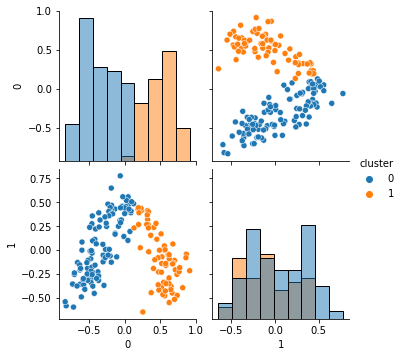

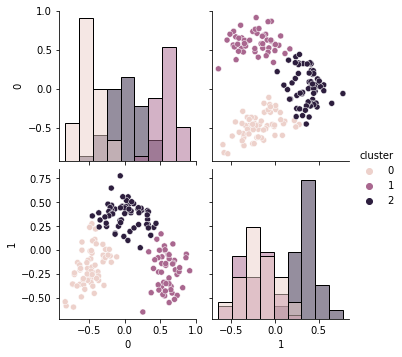

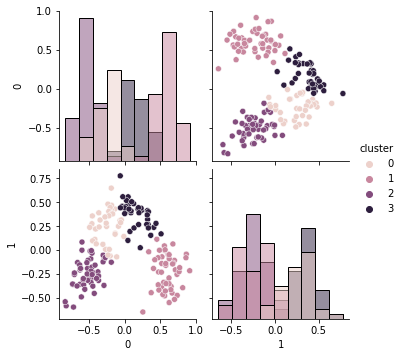

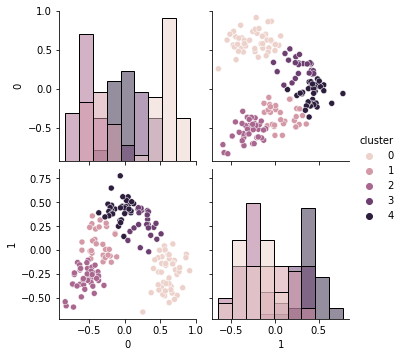

In [6]:
# TASK 3
steps = [('scaler', MinMaxScaler()), ('dimension_reduction', PCA()), ('kmeans', KMeans())]
pipeline = Pipeline(steps) # define the pipeline object.
for n_clusters in [2,3,4,5]:
    pipline = pipeline.set_params(kmeans__n_clusters=n_clusters)
    pipline = pipeline.set_params(dimension_reduction__n_components=2)
    print(pipeline)
    X_ = pipeline.fit_predict(X)   
    df_plot = pd.DataFrame(PCA().fit_transform((MinMaxScaler().fit_transform(X)))[:, :2])    
    df_plot['cluster'] = X_        
    sns.pairplot(df_plot, hue="cluster", diag_kind = 'hist', diag_kws={'alpha':0.5}
                 , vars=[c for c in df_plot.columns if c != 'cluster'] 
                )